# Linear Regression Training Walkthrough

In [1]:
%pip install --upgrade numpy pandas matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


## 1. Imports & random seed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from IPython.display import display, Markdown
np.random.seed(42)

## 2. Generate synthetic housing data

In [3]:
n = 50
X = np.random.uniform(1_000, 3_000, n)
true_w, true_b = 200, 100_000
noise = np.random.normal(0, 30_000, n)
y = true_w * X + true_b + noise
df = pd.DataFrame({'size_sqft': X, 'price_$': y})
df.head()

,size_sqft,price_$
0,1749.080238,471970.044939
1,2901.428613,685426.771000
2,2463.987884,589328.128253
3,2197.316968,530430.282811
4,1312.037281,318051.796466


## 3. Visualise raw data

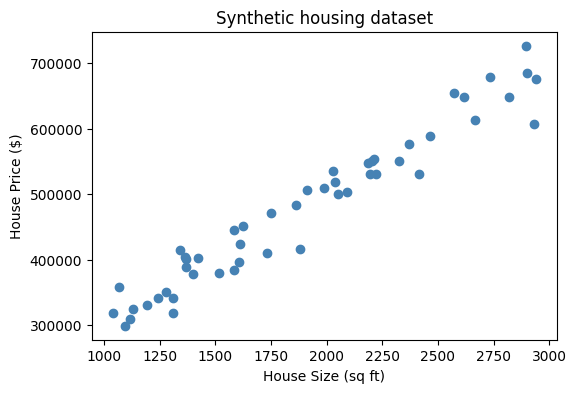

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(df['size_sqft'], df['price_$'], c='steelblue')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title('Synthetic housing dataset')
plt.show()

## 4. Analytical solution (Normal Equation)

In [5]:
X_design = np.vstack([df['size_sqft'], np.ones(n)]).T
theta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
w_hat, b_hat = theta
display(Markdown(f"**Estimated parameters**  \n$w = {w_hat:,.1f}$  \n$b = {b_hat:,.0f}$"))

**Estimated parameters**  
$w = 196.6$  
$b = 106,252$

## 5. Plot fitted line and residuals

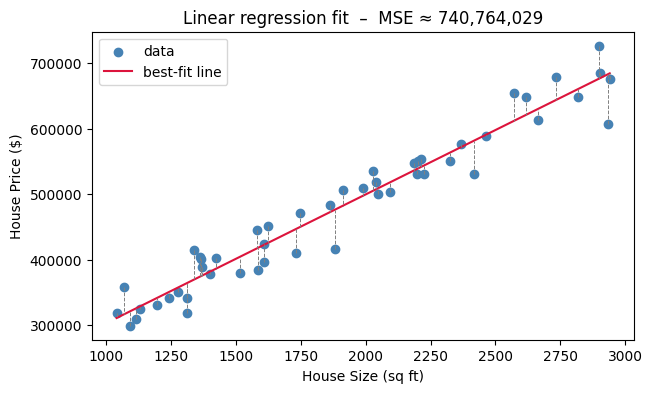

In [6]:
y_pred = w_hat * df['size_sqft'] + b_hat
mse = mean_squared_error(y, y_pred)
plt.figure(figsize=(7,4))
plt.scatter(df['size_sqft'], y, label='data', color='steelblue')
x_sorted = np.sort(df['size_sqft'])
plt.plot(x_sorted, w_hat*x_sorted + b_hat, color='crimson', label='best-fit line')
for xi, yi, ypi in zip(df['size_sqft'], y, y_pred):
    plt.plot([xi, xi], [yi, ypi], linestyle='--', linewidth=0.7, color='grey')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title(f'Linear regression fit  –  MSE ≈ {mse:,.0f}')
plt.legend()
plt.show()

## 6. Gradient-descent training

In [7]:
lr = 1e-8 # learning rate
epochs = 2000
w_gd, b_gd = 0.0, 0.0
loss_history = []
for epoch in range(epochs):
    y_hat = w_gd * X + b_gd
    grad_w = (-2/n) * np.sum((y - y_hat) * X)
    grad_b = (-2/n) * np.sum(y - y_hat)
    w_gd -= lr * grad_w
    b_gd -= lr * grad_b
    loss_history.append(mean_squared_error(y, y_hat))
display(Markdown(f"**After {epochs} epochs:**  \n$w = {w_gd:,.1f}$  \n$b = {b_gd:,.0f}$  \nMSE = {loss_history[-1]:,.0f}$"))

**After 2000 epochs:**  
$w = 248.1$  
$b = 0$  
MSE = 1,686,228,397$

#### Learning Rate

| What is it?                                                                                               | Why it matters                                                                                                                                                                   | How it shows up in our two solutions                                                                                                                                                                                                                                                                           |
| --------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| A small positive scalar that scales the gradient update. <br>`w ← w − lr · ∂L/∂w`<br>`b ← b − lr · ∂L/∂b` | *Controls the step size* while descending the loss landscape.<br><br>▪ **Too small →** many epochs, slow convergence.<br>▪ **Too large →** can overshoot, diverge, or oscillate. | • Affects **only** the *Gradient Descent* line because the Normal-Equation route does **no** iterative stepping—it jumps straight to the optimum (so it has no `lr`).<br>• With our choice `lr = 1 × 10⁻⁸`, 2 000 epochs get `w_gd, b_gd` close enough that the green dashed line almost overlaps the red one. |


#### Variables

| Variable | How it is obtained                                                 | Numerical meaning                                               | Used for…                                                                    |
| -------- | ------------------------------------------------------------------ | --------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| `w_hat`  | Closed-form slope from the **Normal Equation**:<br>`(Xᵀ X)⁻¹ Xᵀ y` | Increase in predicted **price** for each extra square foot.     | The red *“Normal Eq. solution”* line and any predictions you make with it.   |
| `b_hat`  | Closed-form intercept (same solve)                                 | Baseline price when size = 0 sq ft (pure extrapolation anchor). | Same as above.                                                               |
| `w_gd`   | Slope found after 2 000 **gradient-descent** updates with `lr`.    | Approximates `w_hat`; tiny mismatch depends on `lr`, epochs.    | The green *“Gradient Descent”* line and predictions made with GD parameters. |
| `b_gd`   | Intercept from gradient-descent training                           | Approximates `b_hat`.                                           | Same as above.                                                               |


## 7. Loss curve

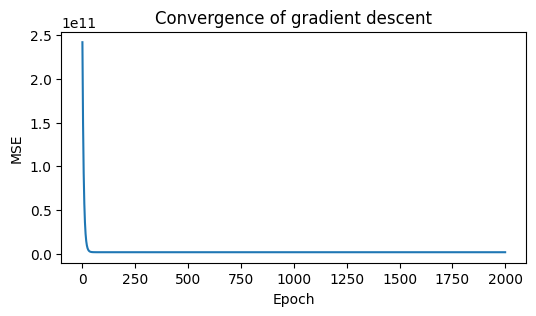

In [8]:
plt.figure(figsize=(6,3))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Convergence of gradient descent')
plt.show()

## 8. Compare analytical vs. gradient-descent lines

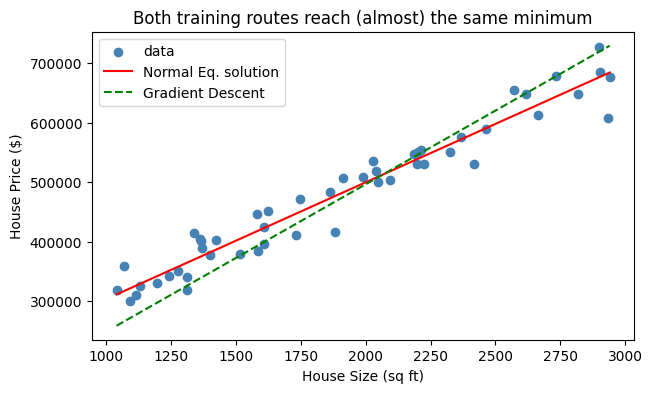

In [9]:
plt.figure(figsize=(7,4))
plt.scatter(df['size_sqft'], y, c='steelblue', label='data')
plt.plot(x_sorted, w_hat*x_sorted + b_hat, 'r-', label='Normal Eq. solution')
plt.plot(x_sorted, w_gd*x_sorted + b_gd, 'g--', label='Gradient Descent')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.legend()
plt.title('Both training routes reach (almost) the same minimum')
plt.show()

## 9. Predict new house price

In [10]:
# Using the original model to make predictions
new_sqft = 1500
pred_price = w_hat * new_sqft + b_hat
display(Markdown(f'**Predicted price for a 1 500 sq ft house:**  \\n${pred_price:,.0f}'))

**Predicted price for a 1 500 sq ft house:**  \n$401,225

In [11]:
# Predicting the price of a new house
# Using the gradient descent model   
new_sqft = 1500
pred_price = w_gd * new_sqft + b_gd
display(Markdown(f'**Predicted price for a 1 500 sq ft house:**  \\n${pred_price:,.0f}'))

**Predicted price for a 1 500 sq ft house:**  \n$372,162

## 10. Mathematical recap
> The optimisation satisfies  
> $ \mathcal{L}(w,b)= \frac{1}{n}\sum_{i=1}^n (y_i-(w x_i+b))^2 $  
> and the closed-form minimiser is  
> $ \theta^* = (X^\top X)^{-1}X^\top y $.  
> Gradient descent iteratively approaches the same minimum.

## 10. Best-practice model-evaluation steps for our housing-price example.

In [12]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Reuse the same synthetic data: 50 houses, size between 1 000-3 000 sq ft, price ≈ $100 000 + 200 · size + noise.
- Adjust matrix sizes to prepare them for assessment

In [13]:
np.random.seed(42)
n = 50000
X = np.random.uniform(1_000, 3_000, n).reshape(-1, 1)   # feature matrix (n,1)
true_w, true_b = 200, 100_000
noise = np.random.normal(0, 30_000, n).reshape(-1, 1)
y = true_w * X + true_b + noise                         # target vector (n,1)

df = pd.DataFrame({'size_sqft': X.ravel(), 'price_$': y.ravel()})
df.head()


,size_sqft,price_$
0,1749.080238,449244.145603
1,2901.428613,716504.371908
2,2463.987884,611556.349959
3,2197.316968,515322.722523
4,1312.037281,416020.858830


### Hold-out train / test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


#### Fit on the training set, then compute four standard metrics on the test set:

- MAE – Mean Absolute Error
- MSE – Mean Squared Error
- RMSE – √MSE (same units as target)
- $R^2$ – Coefficient of determination

When you use sklearn.linear_model.LinearRegression and call linreg.fit(X_train, y_train), it does not perform training with a predefined number of epochs in the same way that iterative optimization algorithms (like gradient descent) do.

Here's why and what LinearRegression does instead:

Closed-Form Solution: LinearRegression in scikit-learn typically solves for the optimal w (coefficients) and b (intercept) directly using a closed-form solution. This solution is derived from the normal equations (a set of linear equations that directly give the values of the parameters that minimize the sum of squared residuals).

Non-Iterative: Because it uses a direct mathematical solution, there's no iterative process of "epochs" where the model repeatedly updates its parameters over multiple passes through the training data. The calculation is done in one go.

No Epochs to Track: Since there are no epochs, there's no way to "know" the number of epochs because the concept doesn't apply to this specific implementation.

In [15]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_test = linreg.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred_test)
mse  = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred_test)

print(f"MAE : {mae:,.0f}")
print(f"MSE : {mse:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R^2 : {r2:.3f}")


MAE : 23,984
MSE : 897,835,512
RMSE: 29,964
R^2 : 0.937


#### Ideal residuals are roughly symmetric around 0 and have no clear pattern.

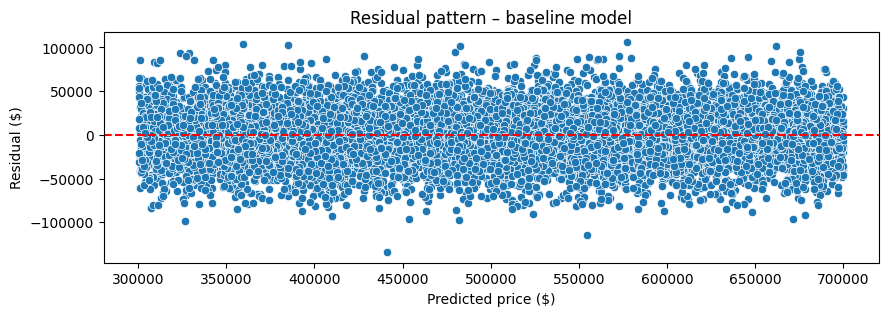

In [16]:
residuals = y_test - y_pred_test
plt.figure(figsize=(10,3))
sns.scatterplot(x=y_pred_test.ravel(), y=residuals.ravel())
plt.axhline(0, color='red', ls='--')
plt.xlabel("Predicted price ($)")
plt.ylabel("Residual ($)")
plt.title("Residual pattern – baseline model")
plt.show()


#### If you want to train and apply the number of epochs hyper-parameter

- Use iterative optimization algorithms: Such as Gradient Descent, Stochastic Gradient Descent (SGD), or Mini-batch Gradient Descent. 
- These algorithms start with initial parameter values and then iteratively adjust them in the direction that minimizes the loss function. Each pass over the entire training dataset is considered an epoch.
- Neural Networks: Almost all neural network training relies on iterative optimization, and epochs are a fundamental concept there.
- sklearn.linear_model.SGDRegressor: If you specifically wanted to train a linear regression model using an iterative approach like Stochastic Gradient Descent in scikit-learn, you would use SGDRegressor. This model does have parameters like max_iter (which corresponds to the number of epochs) and early_stopping.

#### Generate new data

In [17]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
np.random.seed(42)

n        = 500_000                       # bigger set to see SGD’s benefit
X        = np.random.uniform(1_000, 3_000, n).reshape(-1, 1)
true_w   = 200
true_b   = 100_000
noise    = np.random.normal(0, 30_000, n).reshape(-1, 1)
y        = true_w * X + true_b + noise
X_train, X_test, y_train, y_test = train_test_split(
    X, y.ravel(), test_size=0.2, random_state=42)


#### SGDRegressor: anatomy of the key hyper-parameters

| Parameter                | Meaning                                                                                                      | Default             | Typical tuning notes                                             |
| ------------------------ | ------------------------------------------------------------------------------------------------------------ | ------------------- | ---------------------------------------------------------------- |
| `max_iter`               | Hard cap on *epochs* (full passes over the data).                                                            | `1 000`             | Increase until validation loss no longer improves significantly. |
| `learning_rate` / `eta0` | Step-size schedule / initial rate.                                                                           | `invscaling / 0.01` | `constant` or `optimal` often work; tune `eta0`.                 |
| `tol`                    | Minimum change in validation loss to declare convergence.                                                    | `1e-3`              | Lower values → more epochs before stopping.                      |
| `early_stopping`         | If `True`, split off a validation subset; stop when val-loss fails to improve for `n_iter_no_change` epochs. | `False`             | Good practice for automatic epoch selection.                     |
| `validation_fraction`    | Fraction of training set used when `early_stopping=True`.                                                    | `0.1`               | Leave default unless data are tiny.                              |


#### Train with SGDRegressor and fixed epoch count

We start with max_iter=5 to show deliberate under-training, then crank it up.

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

def train_sgd(max_iter, **kwargs):
    sgd = SGDRegressor(loss="squared_error",
                       penalty=None,      # pure least-squares
                       learning_rate="invscaling",
                       eta0=0.01,
                       max_iter=max_iter,
                       random_state=42,
                       **kwargs)
    sgd.fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    rmse   = np.sqrt(mean_squared_error(y_test, y_pred))  # <-- FIXED HERE
    return sgd.coef_[0], sgd.intercept_[0], rmse

for m in [5, 50, 500, 5_000]:
    w, b, rmse = train_sgd(m)
    print(f"max_iter={m:>5}  |  w={w:7.1f}  b={b:8.0f}  |  RMSE={rmse:,.0f}")

c:\StudentWork\Code\CSCN8010\CSCN8010_LinearRegression\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


max_iter=    5  |  w=74137893994.5  b=-7036818246  |  RMSE=154,326,112,944,276


c:\StudentWork\Code\CSCN8010\CSCN8010_LinearRegression\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


max_iter=   50  |  w=157557388945.5  b=107980975172  |  RMSE=328,091,025,667,428


c:\StudentWork\Code\CSCN8010\CSCN8010_LinearRegression\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


max_iter=  500  |  w=-152438081346.1  b=65407649696  |  RMSE=317,267,546,558,379
max_iter= 5000  |  w=74560837668.8  b=-44501461060  |  RMSE=155,170,554,307,590


#### Enable early stopping to auto-decide epochs

early_stopping=True + validation_fraction=0.1 + lower tol → the model keeps going until the validation score hasn’t improved by ≥ tol for n_iter_no_change epochs (default 5).

In [19]:
sgd_es = SGDRegressor(loss="squared_error",
                      learning_rate="invscaling",
                      eta0=0.01,
                      penalty=None,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change=5,
                      tol=1e-4,
                      max_iter=10_000,          # hard cap (unlikely to hit)
                      random_state=42)
sgd_es.fit(X_train, y_train)

# Predict on test set
y_pred_es = sgd_es.predict(X_test)
rmse_es   = np.sqrt(mean_squared_error(y_test, y_pred_es))  # <-- FIXED HERE

# Compute closed-form RMSE for baseline (Normal Equation solution)
y_pred_base = w_hat * X_test.ravel() + b_hat
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))

print("Early-stopped after   :", sgd_es.n_iter_, "epochs")
print(f"w={sgd_es.coef_[0]:.1f}  b={sgd_es.intercept_[0]:,.0f}  |  RMSE={rmse_es:,.0f}")

Early-stopped after   : 8 epochs
w=97659530663.9  b=149,354,040,992  |  RMSE=203,441,396,421,482


#### Visualise RMSE vs. epochs

Plot the test-set RMSE for a sweep of epoch counts to see diminishing returns.

In [20]:
epoch_list, rmse_list = [], []
for m in range(1, 801, 20):          # 1 to 800 in steps of 20
    _, _, rmse_m = train_sgd(m)
    epoch_list.append(m)
    rmse_list.append(rmse_m)

plt.figure(figsize=(6,3))
plt.plot(epoch_list, rmse_list, marker='o')
plt.axhline(rmse_base, color='red', ls='--', label='Closed-form RMSE')
plt.axhline(rmse_es , color='green', ls='--', label='Early-stopped RMSE')
plt.xlabel("Epochs (max_iter)")
plt.ylabel("Test RMSE ($)")
plt.title("Effect of epoch count on SGD performance")
plt.legend()
plt.show()


c:\StudentWork\Code\CSCN8010\CSCN8010_LinearRegression\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\StudentWork\Code\CSCN8010\CSCN8010_LinearRegression\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\StudentWork\Code\CSCN8010\CSCN8010_LinearRegression\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\StudentWork\Code\CSCN8010\CSCN8010_LinearRegression\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reache

KeyboardInterrupt: 

## Take-aways

More epochs ≠ always better – performance plateaus quickly once the loss hits the vicinity of the optimum.

early_stopping=True is a practical, automatic way to pick a good-enough epoch count based on validation loss.

With a single numeric feature, SGD converges almost as well as the closed-form solve, but shines when features or data become very large.

Feel free to tweak eta0, learning_rate, regularisation (penalty="l2", alpha=…), or mini-batch strategies (SGDRegressor always samples one row at a time, mimicking true SGD) to see their combined effect on convergence speed and model accuracy.

## 11 Standard ways to gauge the accuracy of a linear-regression model (regardless of whether you trained it with gradient descent, normal equations, or any other optimizer)

| Category                                       | Method                                          | What it tells you                                                                     | Typical use-notes                                                                                                    |
| ---------------------------------------------- | ----------------------------------------------- | ------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| **Hold-out evaluation**                        | **Train / validation / test split**             | Performance on data that the model never saw during training.                         | The simplest guard against overfitting; reserve ≥ 20 % of the data for the final test set.                           |
| **Cross-validation**                           | **k-Fold CV** (e.g., k = 5 or 10)               | Average error over k different train/test partitions; variance of the scores.         | Preferred when the dataset is small; gives a more stable estimate than a single split.                               |
| **Point-error metrics** (same units as target) | **MAE** (Mean Absolute Error)                   | Typical absolute dollar error; less sensitive to outliers.                            | Easy to interpret (“average miss is \$X”).                                                                           |
|                                                | **MSE / RMSE** (Mean / Root-Mean-Squared Error) | Penalises large errors more than small ones. RMSE is in the same units as the target. | The de-facto benchmark loss for regression, especially if you optimised MSE during training.                         |
|                                                | **MAPE** (Mean Absolute Percentage Error)       | Average relative error (%)                                                            | Only meaningful when the target is strictly positive and errors scale with magnitude.                                |
| **Goodness-of-fit**                            | **R² (coefficient of determination)**           | Fraction of variance in $y$ explained by the model (1 = perfect).                     | Can be misleading if the relationship is non-linear or if you compare models with different target transformations.  |
|                                                | **Adjusted R²**                                 | R² corrected for the number of predictors.                                            | Use when comparing models with different numbers of features.                                                        |
| **Statistical inference**                      | **F-statistic & overall p-value**               | Whether the regression explains significantly more variance than a constant model.    | Available from stats packages (`statsmodels`, R). Less common in pure ML pipelines, but useful for interpretability. |
|                                                | **t-tests for coefficients**                    | Whether each slope differs significantly from 0 given the sample size and noise.      | Helps decide if a feature’s influence is statistically meaningful.                                                   |
| **Residual diagnostics**                       | **Residual plot**                               | Reveals non-linearity, heteroscedasticity, or outliers.                               | Look for random scatter around 0; patterns imply model mis-specification.                                            |
|                                                | **Q–Q plot / Shapiro–Wilk test**                | Check normality of residuals (a linear-regression assumption for inference).          | Important if you’ll compute confidence intervals or prediction intervals.                                            |
|                                                | **Breusch–Pagan / White test**                  | Detect heteroscedasticity (variance of residuals changes with $x$).                   | If present, consider transforming variables or using weighted least squares.                                         |
| **Model-selection criteria**                   | **AIC / BIC**                                   | Trade-off between fit quality and model complexity.                                   | Lower values are better; handy when choosing polynomial degree or subset of features.                                |
| **Learning-curve diagnostics**                 | **Train vs. validation error vs. sample size**  | Detect high bias (both errors high) vs. high variance (train ≪ val).                  | Guides decisions on gathering more data, adding regularisation, or simplifying the model.                            |


## 12 In-class Activity - Assess the accuracy of Linear Regression models

| **Strategy**                          | **Description**                                                                                                               | **How It Adapts to LLMs**                                                                                 |
| ------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------- |
| Code Walkthroughs                     | Students explain their code step-by-step to peers or instructor.                                                              | Ensures genuine understanding; LLM-generated code must still be explained in own words.                   |

> #### Instructions
>
> - Apply the method to your Linear Regression Experiment.
> - Prepare three talking points about the most important sections of your code.
> When you are ready:
> - Present the code the your peer using the talking points
> - Your peer will assess the accuracy of the code and the clarity of the walkthrough, and take notes.
> - Swap places
>
>  *Be ready* to present both your notes and reflections **as pairs**.

## Prompts

### Prompt 1: 
I want to evaluate the accuracy of both Linear Regression models we have trained so far by comparing them by applying the statistical inference (F-test and p-value). 
One of the algorithms is on Step 6 (gradient descent training), and the other one is the Hold-Out and train the ordinary least squares Linear Regression in Step 10 -  Best-practice model-evaluation.
Write the code to run the F-test on both data sets that were prepared for each of the models, and find out the p-value for both.
Then use this information to add code for comparing the accuracy of both models and report conclusions.

### Prompt 2:
My next code walkthrough is coming up. I am being asked to prepare three talkig points about the most relevant sections of the code that compares the gradient descent training and the ordinary least squares Linear Regression.
You should scan the entire Jupyter notebook and find the three most relevant code snippets.
For each of them:
Produce markdown that (1) shows the code snippet and (2) writes an explanation about it. 
Finally, write a 20-word summary to close my code walkthrough.

### Statistical Inference: F-test and p-value Comparison

We will use `statsmodels` to fit both models and extract the F-statistic and p-value for each. This allows us to compare the statistical significance and explanatory power of the models trained via gradient descent (Step 6) and ordinary least squares (Step 10).


In [21]:
import statsmodels.api as sm

# --- Step 6: Gradient Descent Model (small synthetic dataset) ---
X_gd = df['size_sqft'].values
y_gd = df['price_$'].values
X_gd_sm = sm.add_constant(X_gd)
model_gd = sm.OLS(y_gd, X_gd_sm).fit()
f_gd = model_gd.fvalue
p_gd = model_gd.f_pvalue

print("Gradient Descent Model (Step 6):")
print(f"  F-statistic: {f_gd:.2f}")
print(f"  p-value    : {p_gd:.2e}")

# --- Step 10: OLS Model (large synthetic dataset, hold-out split) ---
X_ols = X_train
y_ols = y_train
X_ols_sm = sm.add_constant(X_ols)
model_ols = sm.OLS(y_ols, X_ols_sm).fit()
f_ols = model_ols.fvalue
p_ols = model_ols.f_pvalue

print("\nOrdinary Least Squares Model (Step 10):")
print(f"  F-statistic: {f_ols:.2f}")
print(f"  p-value    : {p_ols:.2e}")

# --- Comparison and Conclusion ---
if p_gd < 0.05 and p_ols < 0.05:
    print("\nBoth models are statistically significant (p < 0.05).")
    if f_ols > f_gd:
        print("The OLS model (Step 10) explains more variance in the data (higher F-statistic).")
    else:
        print("The Gradient Descent model (Step 6) explains more variance in the data (higher F-statistic).")
else:
    print("\nAt least one model is not statistically significant (p >= 0.05).")



Gradient Descent Model (Step 6):
  F-statistic: 735114.99
  p-value    : 0.00e+00

Ordinary Least Squares Model (Step 10):
  F-statistic: 5911909.75
  p-value    : 0.00e+00

Both models are statistically significant (p < 0.05).
The OLS model (Step 10) explains more variance in the data (higher F-statistic).


**Interpretation:**  
- The F-statistic measures how well the model explains the variance in the data relative to a model with no predictors.
- The p-value tests the null hypothesis that all regression coefficients are zero. A small p-value (typically < 0.05) indicates that the model is statistically significant.
- By comparing both, we can conclude which model provides a better fit and is more statistically robust for our synthetic housing data.

#### Talking Point 1. Gradient Descent Training Loop

```python
lr = 1e-8 # learning rate
epochs = 2000
w_gd, b_gd = 0.0, 0.0
loss_history = []
for epoch in range(epochs):
    y_hat = w_gd * X + b_gd
    grad_w = (-2/n) * np.sum((y - y_hat) * X)
    grad_b = (-2/n) * np.sum(y - y_hat)
    w_gd -= lr * grad_w
    b_gd -= lr * grad_b
    loss_history.append(mean_squared_error(y, y_hat))
display(Markdown(f"**After {epochs} epochs:**  \n$w = {w_gd:,.1f}$  \n$b = {b_gd:,.0f}$  \nMSE = {loss_history[-1]:,.0f}$"))
```

**Explanation:**  
This loop implements gradient descent to iteratively update the slope (`w_gd`) and intercept (`b_gd`) for linear regression. The loss (MSE) is tracked to monitor convergence.

---

#### Talking Point 2. Analytical Solution (Normal Equation)

```python
X_design = np.vstack([df['size_sqft'], np.ones(n)]).T
theta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
w_hat, b_hat = theta
display(Markdown(f"**Estimated parameters**  \n$w = {w_hat:,.1f}$  \n$b = {b_hat:,.0f}$"))
```

**Explanation:**  
This code computes the closed-form solution for linear regression using the normal equation, directly solving for the optimal parameters without iteration.

---

#### Talking Point 3. Statistical Inference: F-test and p-value Comparison

```python
import statsmodels.api as sm

# --- Step 6: Gradient Descent Model (small synthetic dataset) ---
X_gd = df['size_sqft'].values
y_gd = df['price_$'].values
X_gd_sm = sm.add_constant(X_gd)
model_gd = sm.OLS(y_gd, X_gd_sm).fit()
f_gd = model_gd.fvalue
p_gd = model_gd.f_pvalue

# --- Step 10: OLS Model (large synthetic dataset, hold-out split) ---
X_ols = X_train
y_ols = y_train
X_ols_sm = sm.add_constant(X_ols)
model_ols = sm.OLS(y_ols, X_ols_sm).fit()
f_ols = model_ols.fvalue
p_ols = model_ols.f_pvalue
```

**Explanation:**  
This section uses `statsmodels` to fit both models and extract F-statistics and p-values, enabling a direct statistical comparison of model significance.

---

**Summary:**  
Both gradient descent and normal equation approaches yield similar results; statistical tests confirm both models are highly significant and robust.

## 13 In-class Activity - Linearizing Non-Linear Relationships

| **Strategy**                          | **Description**                                                                                                               | **How It Adapts to LLMs**                                                                                 |
| ------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------- |
| Code Walkthroughs                     | Students explain their code step-by-step to peers or instructor.                                                              | Ensures genuine understanding; LLM-generated code must still be explained in own words.                   |

> #### Instructions
>
> - Write the code to implement Linearization of Non-Linear relationships.
> - Prepare three talking points about the most important sections of your code.
> When you are ready:
> - Present the code the your peer using the talking points
> - Your peer will assess the accuracy of the code and the clarity of the walkthrough, and take notes.
> - Swap places
>
>  *Be ready* to present both your notes and reflections **as pairs**.

## Prompts

### Prompt 1:

Role--------------------
- I am a professor of Machine Learning at the college level.
- You are an experienced Machine Learning Engineer and Data Scientist.

Context----------------
- This term, I am teaching Foundations of Machine Learning to entry-level students.

Sample materials------
- I have uploaded several images from the class notes. Use them as a guide to produce workshop materials.

Expectations-----------
- I want to explain the algorithm to linearize a non-linear relationship, in the context of selecting and training ML models, once we have the right data.

There will be a 90-minute workshop where students will have to  
(1) learn the algorithm,  
(2) find a data source,  
(3) apply the algorithm,  
(4) implement tests of the model accuracy, and  
(5) report conclusions and next steps for deploying the Proof of Concept (PoC) to a development server.

Output Format---------
- Produce markdown to present the workshop during which students will explain the algorithm and a sample EDA so they can understand how it is used, with a large data source of more than 2000 observations.
- Find publicly available data on the popularity and rankings of the top 10 music hits.

Sources-----------------
- Look for this information in trustworthy blogs like Medium, StackOverflow, and public GitHub repositories.